Na podstawie wariantów w pliku wejściowym wykonaj wykres słupkowy, w którym na osi x
będą wszystkie chromosomy autosomalne, a na osi y średnie pokrycie (depth of coverage)
wszystkich wariantów występujących na danym chromosomie. Jeżeli napotkasz wartości
brakujące (“.”), potraktuj je jako 0. Średnie pokrycia wszystkich chromosomów zapisz
również w tabelce (.csv, .tsv, lub Excel).

На основе вариантов во входном файле создайте гистограмму со всеми аутосомными хромосомами по оси x и средней глубиной покрытия по оси y.
все варианты данной хромосомы. Если вы обнаружите пропущенные значения («.»), Считайте их 0. Также запишите средний охват всех хромосом в таблице (.csv, .tsv или Excel).

In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!vcftools --gzvcf ./CPCT02220079.annotated.processed.vcf.gz  --out ./depth  --recode


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ./CPCT02220079.annotated.processed.vcf.gz
	--out ./depth
	--recode

Using zlib version: 1.2.11
After filtering, kept 1 out of 1 Individuals
Outputting VCF file...
After filtering, kept 5062982 out of a possible 5062982 Sites
Run Time = 103.00 seconds


In [3]:
columns_free=["CHROM","POS","ID","REF","ALT","QUAL","FILTER","None", "FORMAT", "SAMPLE",]
df = pd.read_csv("./depth.recode.vcf", comment='#', sep="\t", names=columns_free, index_col=None)
df.shape

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(5062781, 10)

In [4]:
df.head(3)

CHROM    POS          ID                                     REF ALT  \
0     1  10146           .                                      AC   A   
1     1  10403           .  ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC   A   
2     1  10492  rs55998931                                       C   T   

      QUAL FILTER None                  FORMAT  \
0  6557.73   PASS    .          GT:AD:DP:GQ:PL   
1   178.73   PASS    .  GT:AD:DP:GQ:PGT:PID:PL   
2   100.77   PASS    .  GT:AD:DP:GQ:PGT:PID:PL   

                                              SAMPLE  
0                       1/1:0,731:731:99:6595,1525,0  
1  0/1:8,6:14:99:0|1:10403_ACCCTAACCCTAACCCTAACCC...  
2  0/1:11,5:16:99:1|0:10403_ACCCTAACCCTAACCCTAACC...

In [5]:
df["Depth"] = df["SAMPLE"].str.split(":", expand=True,)[2]

In [6]:
df["CHROM"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, '22', 'X', 'Y', 'MT'], dtype=object)

In [8]:
df[["CHROM", "Depth"]].to_csv("temp_task6.tsv", sep="\t", index=False)

In [5]:
df = pd.read_csv("./temp_task6.tsv", sep="\t")
df = df[(df['CHROM'] != "MT") & (df['CHROM'] != "X") & (df['CHROM'] != "Y")]

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


CHROM  Depth
0           1    731
1           1     14
2           1     16
3           1     11
4           1     30
...       ...    ...
4877759    22      9
4877760    22     10
4877761    22     10
4877762    22     20
4877763    22     20

[4877764 rows x 2 columns]

In [8]:
new_temp = df.groupby('CHROM').mean()

In [23]:
new_temp.to_csv("./task6.tsv", sep="\t", index=False)

In [16]:
new_temp = new_temp.reset_index()

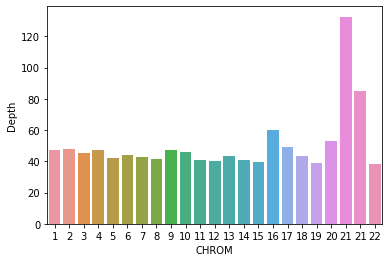

In [19]:
plot = sns.barplot(x="CHROM", y="Depth", data=new_temp)

In [22]:
plot.figure.savefig("./depth.png")